In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on
%matplotlib inline
import zhu_draw as zd
import zhu_contour as zc
import zhu_symmetry as zs
import imp
from matplotlib import pyplot as plt

In [89]:
import numpy as np
for m in [zc, zd, zs]:
    imp.reload(m)

In [90]:
from time import time


def change_find_sym_args(u, u_img, n_mult=2, beta=1):
    start = time()
    q, (p, v) = zs.find_sym(u, n_mult=n_mult, beta=beta)
    t = time() - start
    theta = np.angle(v)
    p1, p2 = zs.axis_points(u_img, p, v)
    u_new, vec, scale = zc.preprocess(zc.fix_period(u, n_mult))
    f_new = np.fft.fft(u_new)
    p_new = (p - vec) / scale
    sym_ind = zs.nearest_to_line(u_new, p_new, p_new + v)
    f_sym = zs.new_start_point(f_new, sym_ind)
    f_ind, *_ = zs.f_abs_based_index(f_sym, beta)
    return q, p1, p2, theta, t, f_sym[f_ind]

In [91]:
folder = 'data/to_visapp/planes'
u_lists = zc.from_folder(folder, get_all=False, from_txt=True)
beta_list = np.arange(0.01, 1.01, 0.01)
txt_results = {}
img_results = {}
for name_txt in u_lists:
    name = name_txt[:-4]
    print(name)
    name_img = folder + '/' + name + '.bmp'
    u_img = zc.get_contours(name_img)[0]
    img_results[name] = change_find_sym_args(u_img, u_img)
    u_txt = u_lists[name_txt][0]
    txt_results[name] = [change_find_sym_args(u_txt, u_img, beta=beta)
                         for beta in beta_list]

1361.mask
226.mask
50.mask
59.mask
70.mask
895.mask
904.mask
A-10_Thunderbolt_015
B-2A_Spirit_015
B-52H_Stratofortress_270
C-135_Stratolifter_195
C-135_Stratolifter_255
C-17_GlobemasterIII_030
C-20_GulfstreamIII_210
C-20_GulfstreamIII_315
C-21_Learjet_285
C-21_Learjet_315
C-27_Spartan_060
C-5_Galaxy_120
camel


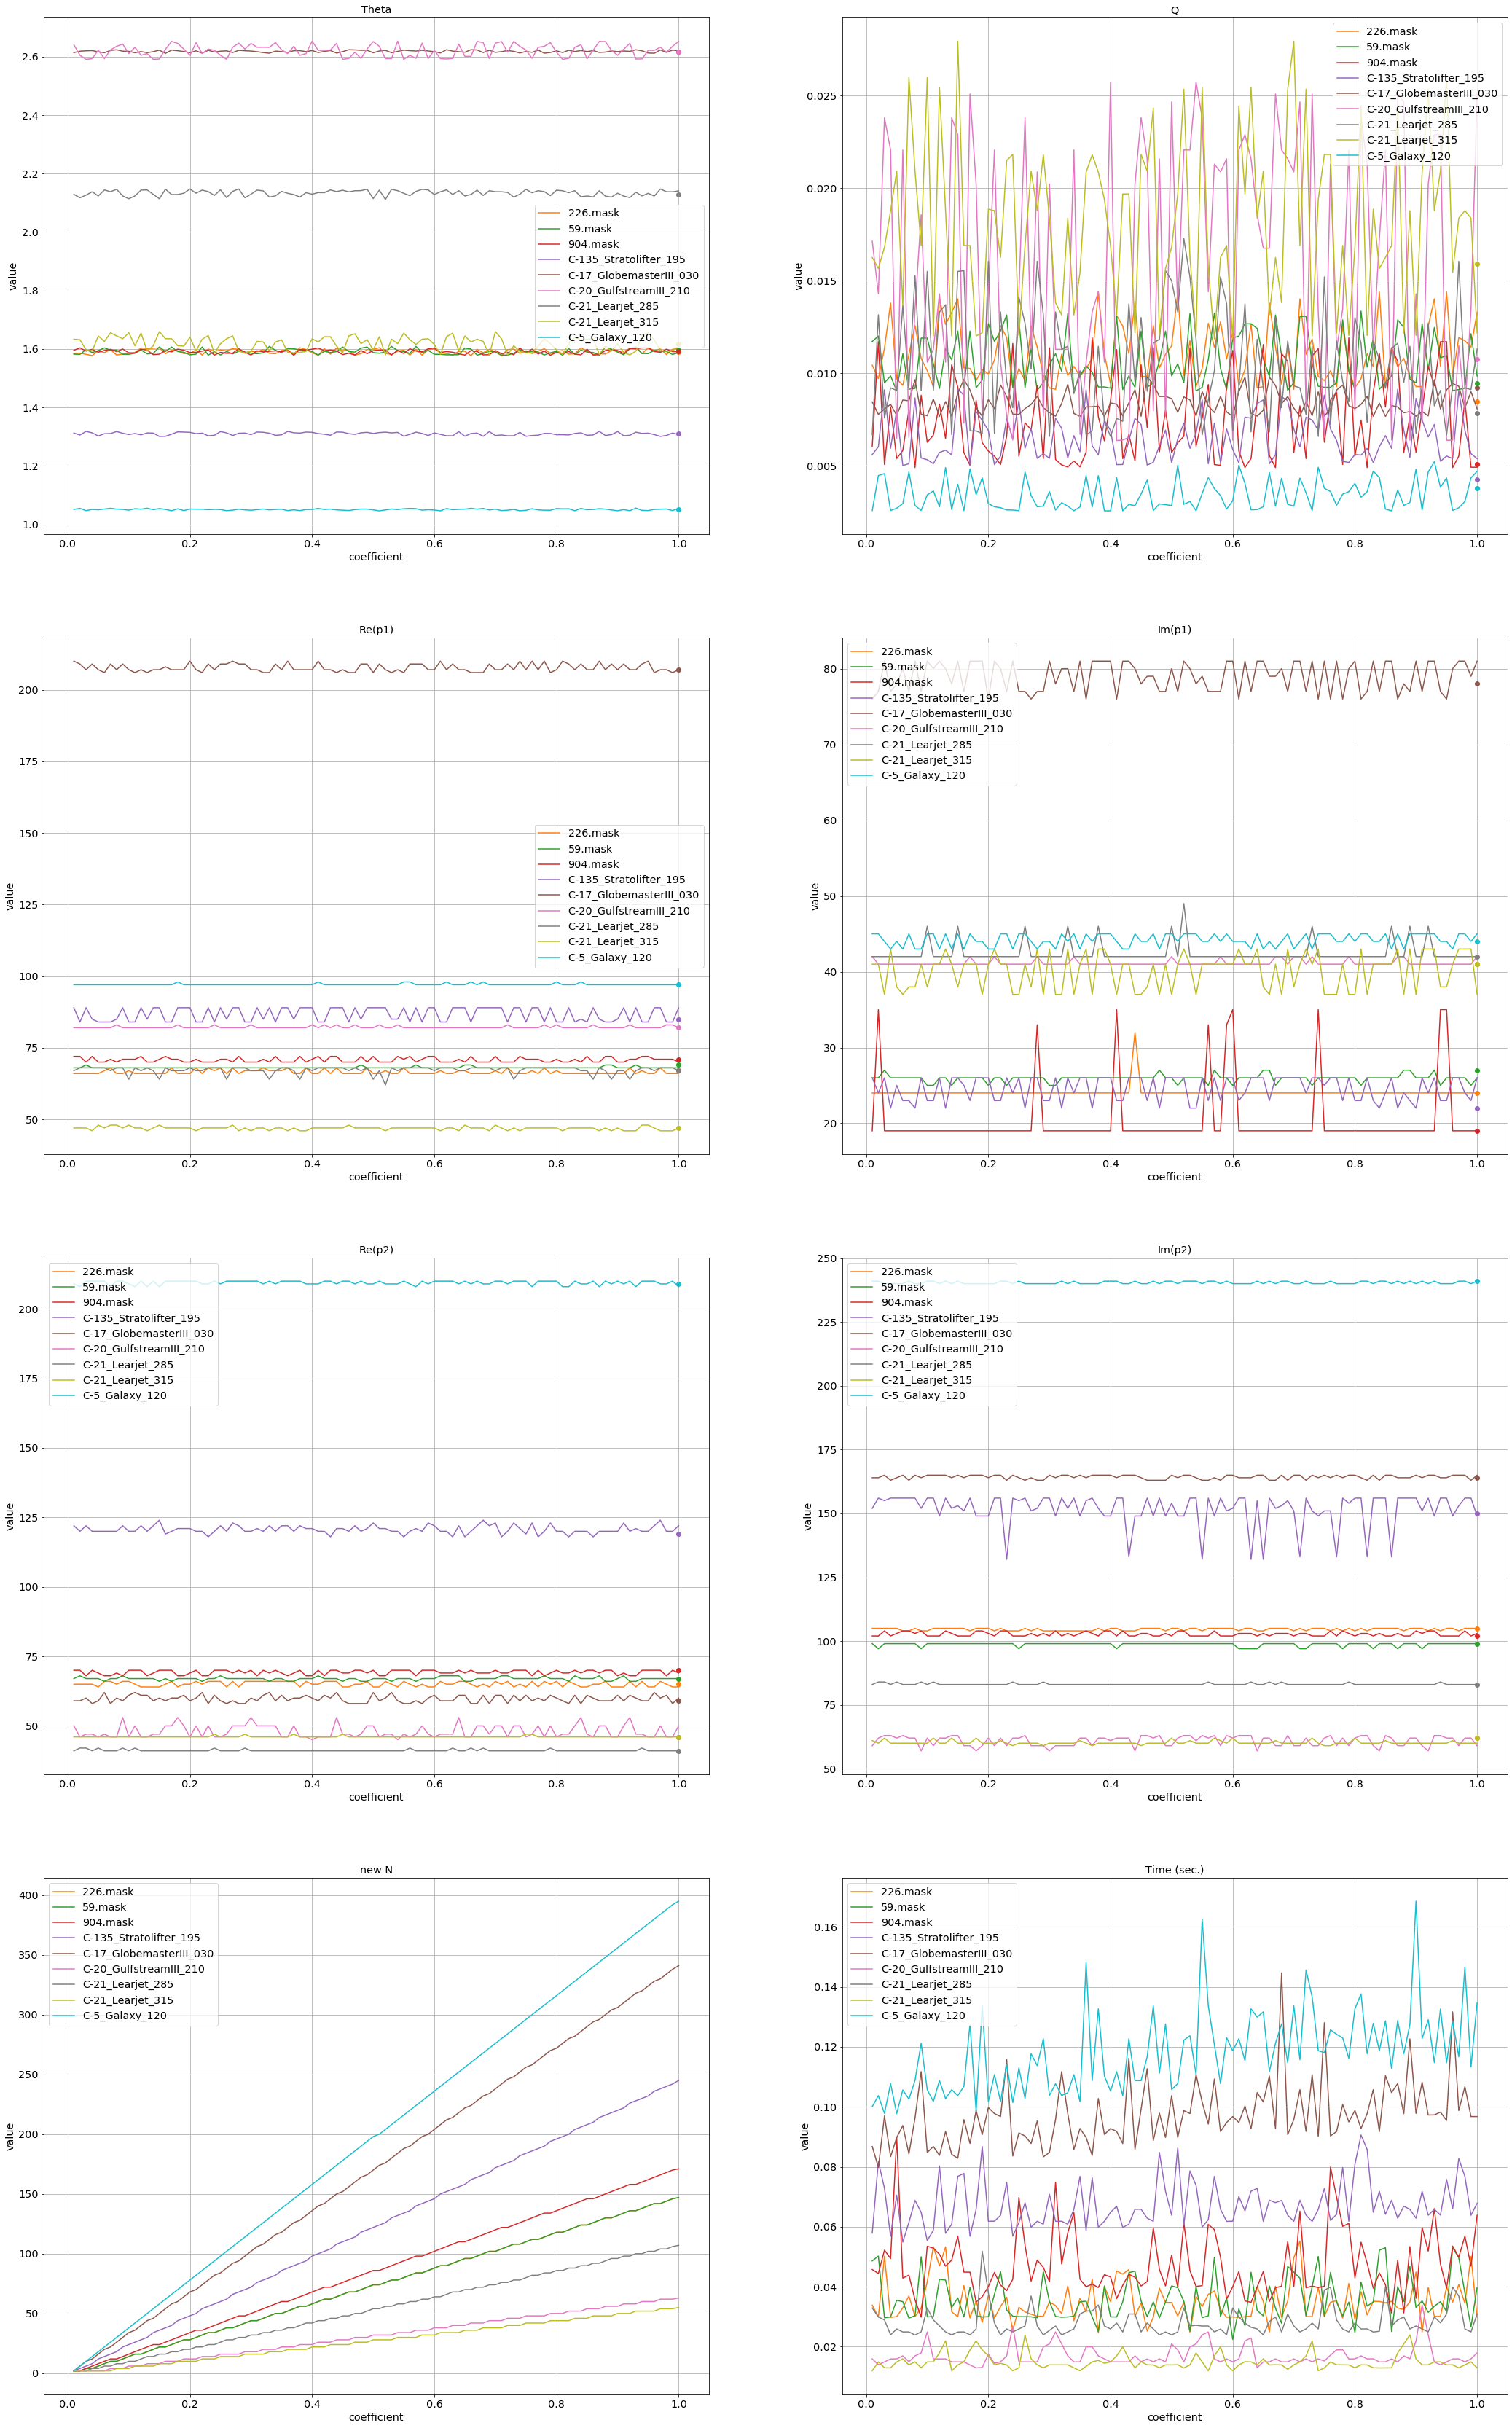

In [92]:
def dummy(x):
    return x


args = [
    ('Theta', 3, dummy),
    ('Q', 0, dummy),
    ('Re(p1)', 1, np.real),
    ('Im(p1)', 1, np.imag),
    ('Re(p2)', 2, np.real),
    ('Im(p2)', 2, np.imag),
    ('new N', 5, len),
    ('Time (sec.)', 4, dummy)
]
all_keys = np.array(list(txt_results.keys()))
keys = all_keys.copy()
keys = all_keys[np.sort(np.random.permutation(len(all_keys))[:9])]
cols = 2
rows = (len(args) + cols - 1) // cols
zd.prepare_scene()
fig, axs = plt.subplots(rows, cols,
                        figsize=(18*cols, 15*rows))
for i, (title, ind, func) in enumerate(args):
    row = i // cols
    col = i % cols
    ax = axs[row][col]
    ax.set_xlabel('coefficient')
    ax.set_ylabel('value')
    for i, name in enumerate(keys):
        values = [func(el[ind]) for el in txt_results[name]]
        ax.plot(beta_list, values, color='C'+str(i+1), label=name)
        if title not in ['new N', 'Time (sec.)']:
            ax.plot([beta_list[-1]], [func(img_results[name][ind])],
                    'o', color='C'+str(i+1))
    ax.set_title(title)
    ax.legend()
    ax.grid()
zd.savefig('beta_changing')
plt.show()

In [ ]:
folder = 'data/to_visapp/planes'
u_lists = zc.from_folder(folder, get_all=False, from_txt=True)
n_mult_list = np.arange(0.1, 5.1, 0.1)
txt_results = {}
img_results = {}
for name_txt in u_lists:
    name = name_txt[:-4]
    print(name)
    name_img = folder + '/' + name + '.bmp'
    u_img = zc.get_contours(name_img)[0]
    img_results[name] = change_find_sym_args(u_img, u_img)
    u_txt = u_lists[name_txt][0]
    txt_results[name] = [change_find_sym_args(u_txt, u_img, n_mult)
                         for n_mult in n_mult_list]

In [17]:
folder = 'data/to_visapp/planes'
u_lists = zc.from_folder(folder, get_all=False, from_txt=True)
alpha_list = np.arange(0, 0.3, 0.01)
txt_results = {}
img_results = {}
for name_txt in u_lists:
    name = name_txt[:-4]
    print(name)
    name_img = folder + '/' + name + '.bmp'
    u_img = zc.get_contours(name_img)[0]
    img_results[name] = change_find_sym_args(u_img, u_img)
    u_txt = u_lists[name_txt][0]
    txt_results[name] = [change_find_sym_args(u_txt, u_img, alpha=alpha)
                         for alpha in alpha_list]

1361.mask
226.mask
50.mask
59.mask
70.mask
895.mask
904.mask
A-10_Thunderbolt_015
B-2A_Spirit_015
B-52H_Stratofortress_270
C-135_Stratolifter_195
C-135_Stratolifter_255
C-17_GlobemasterIII_030
C-20_GulfstreamIII_210
C-20_GulfstreamIII_315
C-21_Learjet_285
C-21_Learjet_315
C-27_Spartan_060
C-5_Galaxy_120
camel


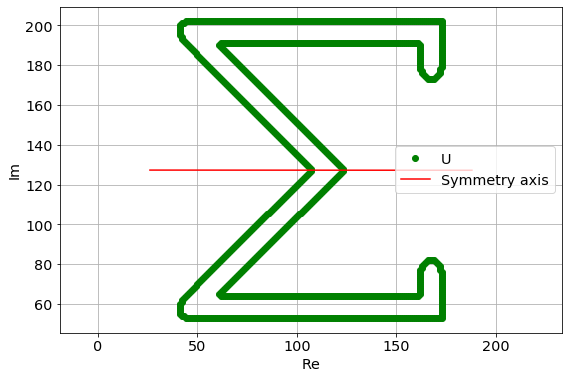

In [88]:
path = "data/truesym_examples/sigma.bmp"
for u in zc.get_contours(path):
    q, (p, v) = zs.find_sym(u)
    zd.draw_contour('plt', u, p, v)
    plt.show()

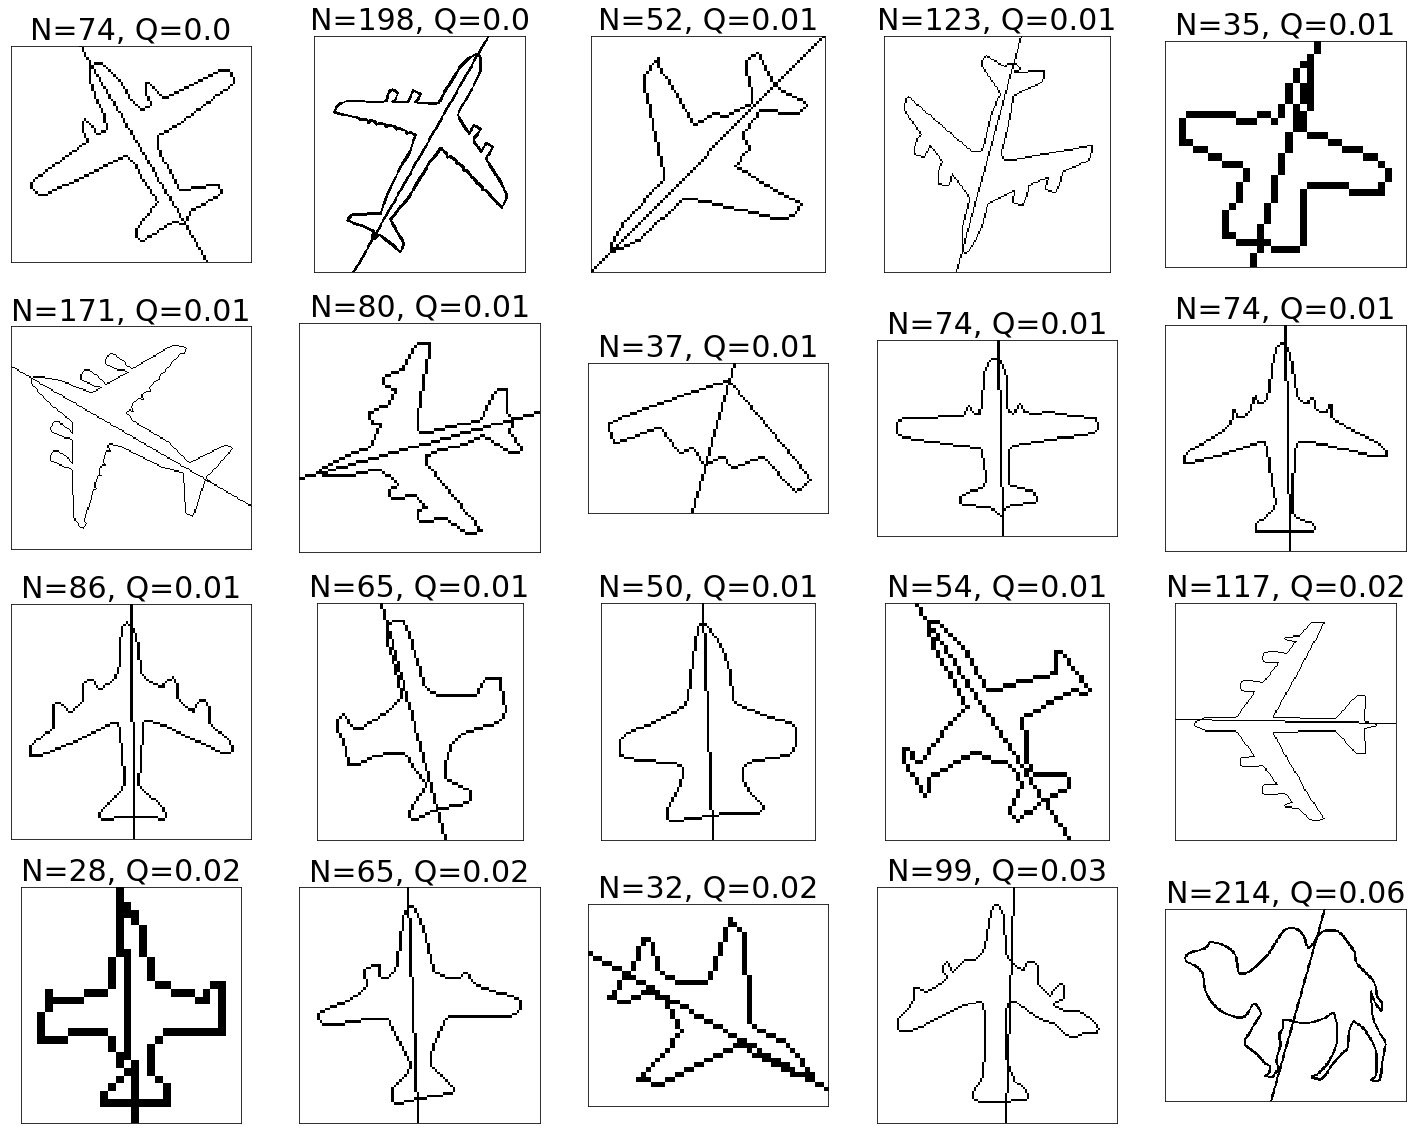

In [93]:
folder = 'data/to_visapp/planes'
zd.subploter(zs.get_drawing_args(folder, False, True))
zd.savefig(folder.split('/')[-1]+'_from_txt', fmt='png')
plt.show()

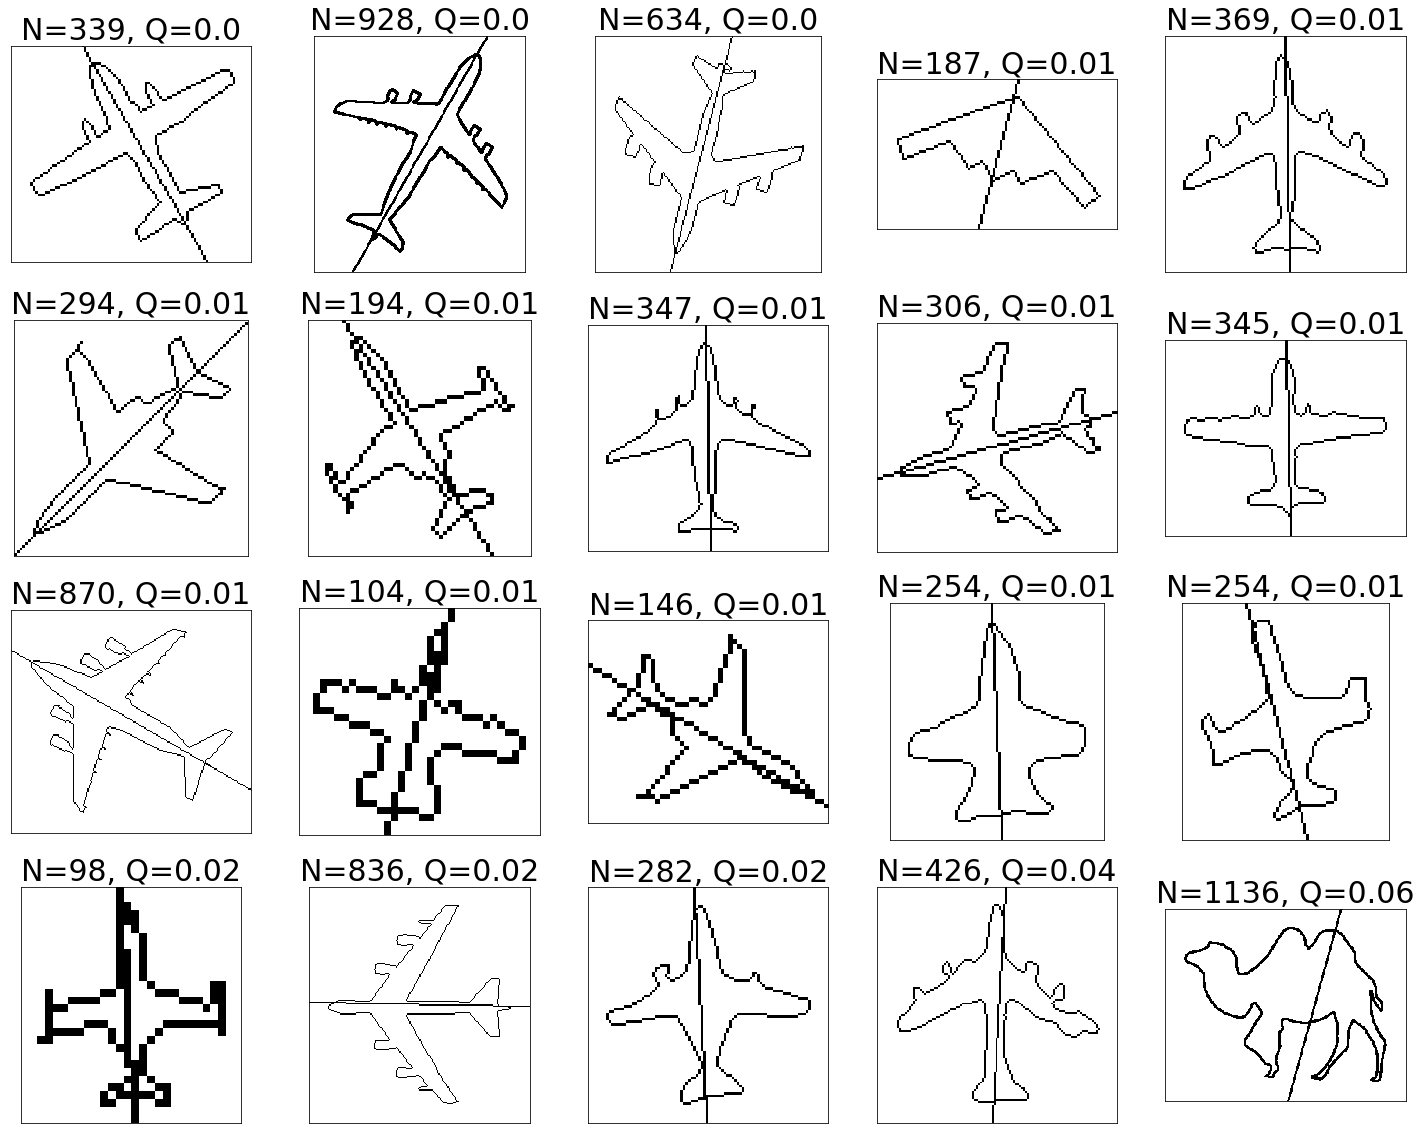

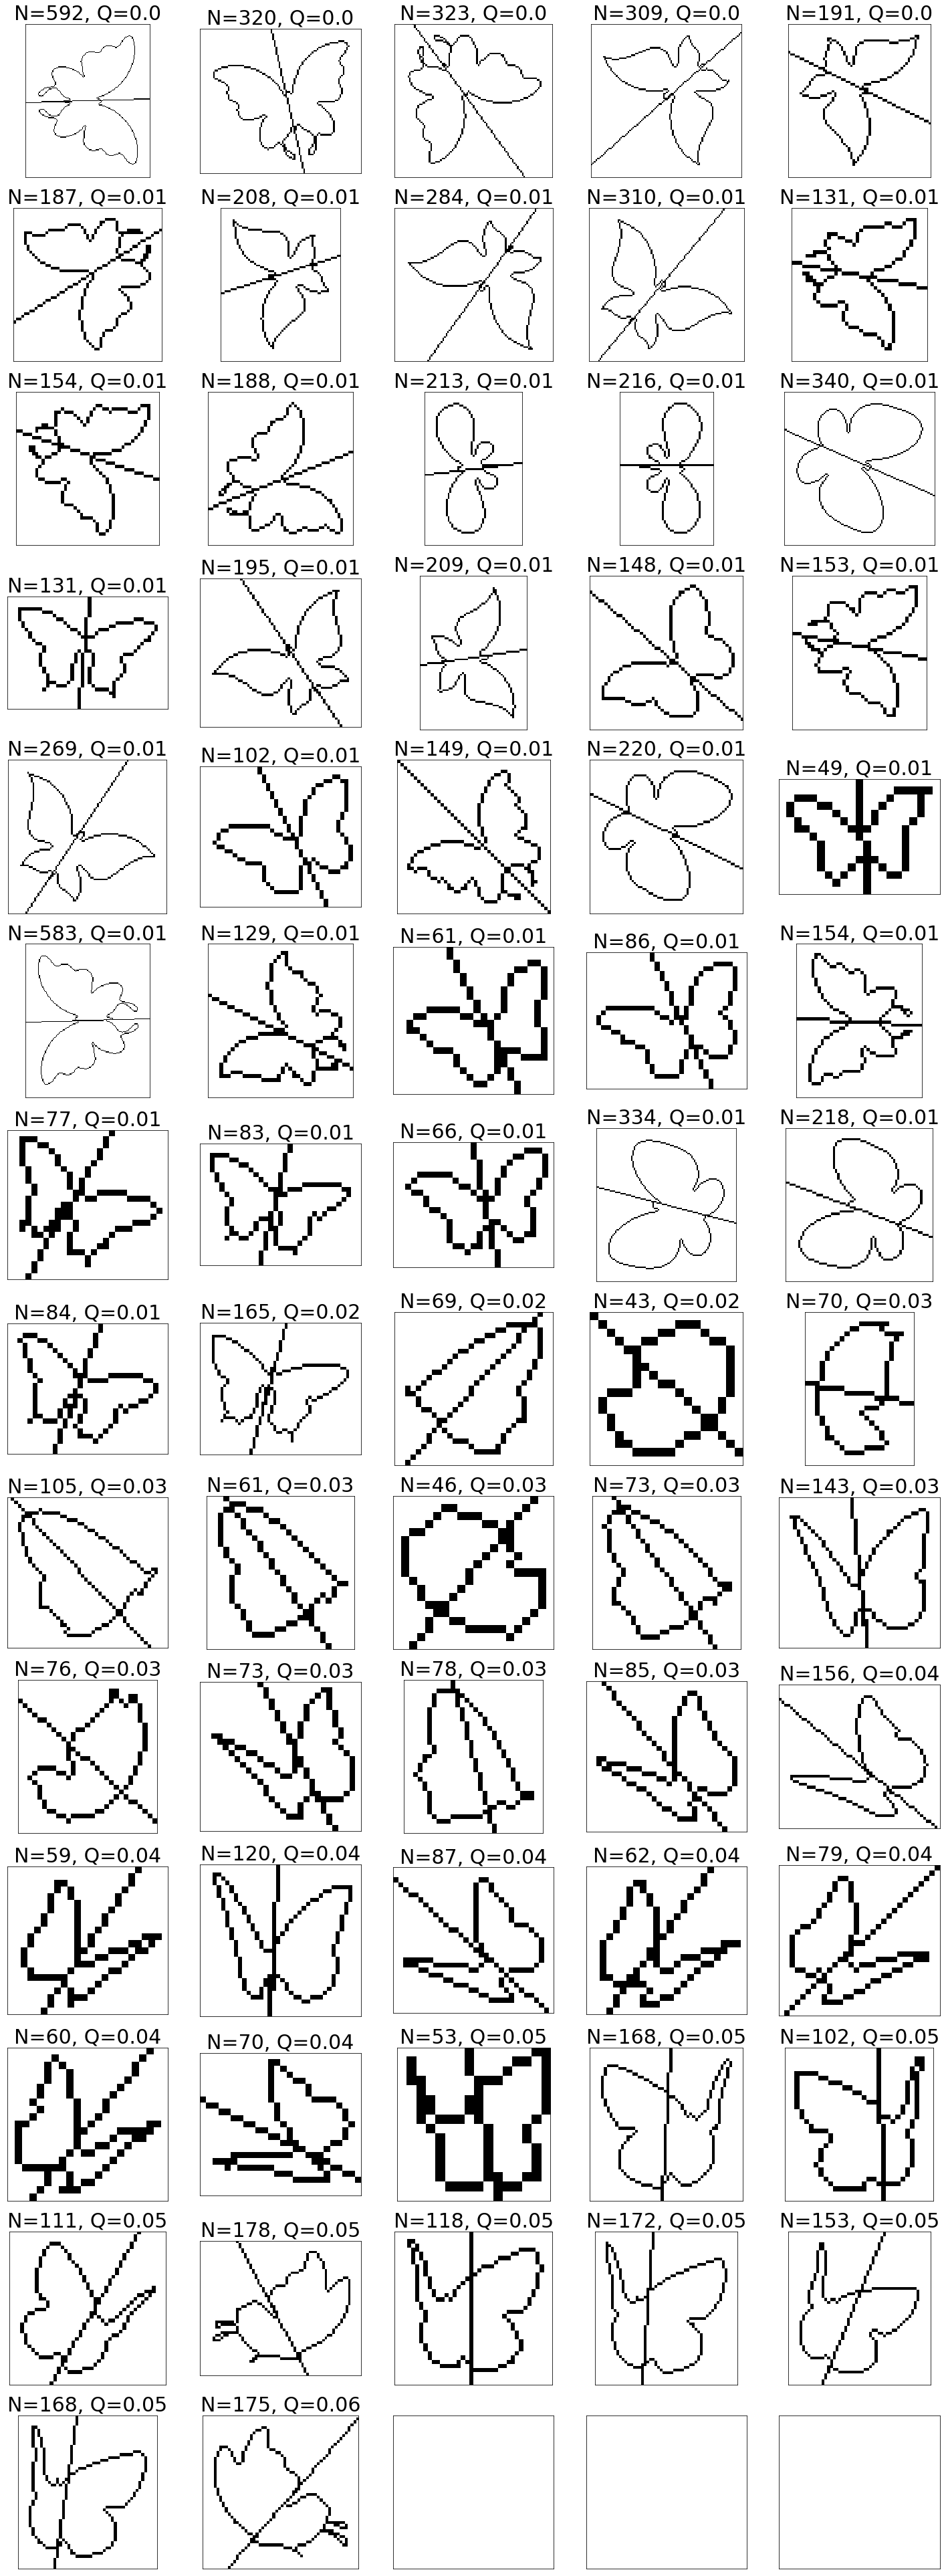

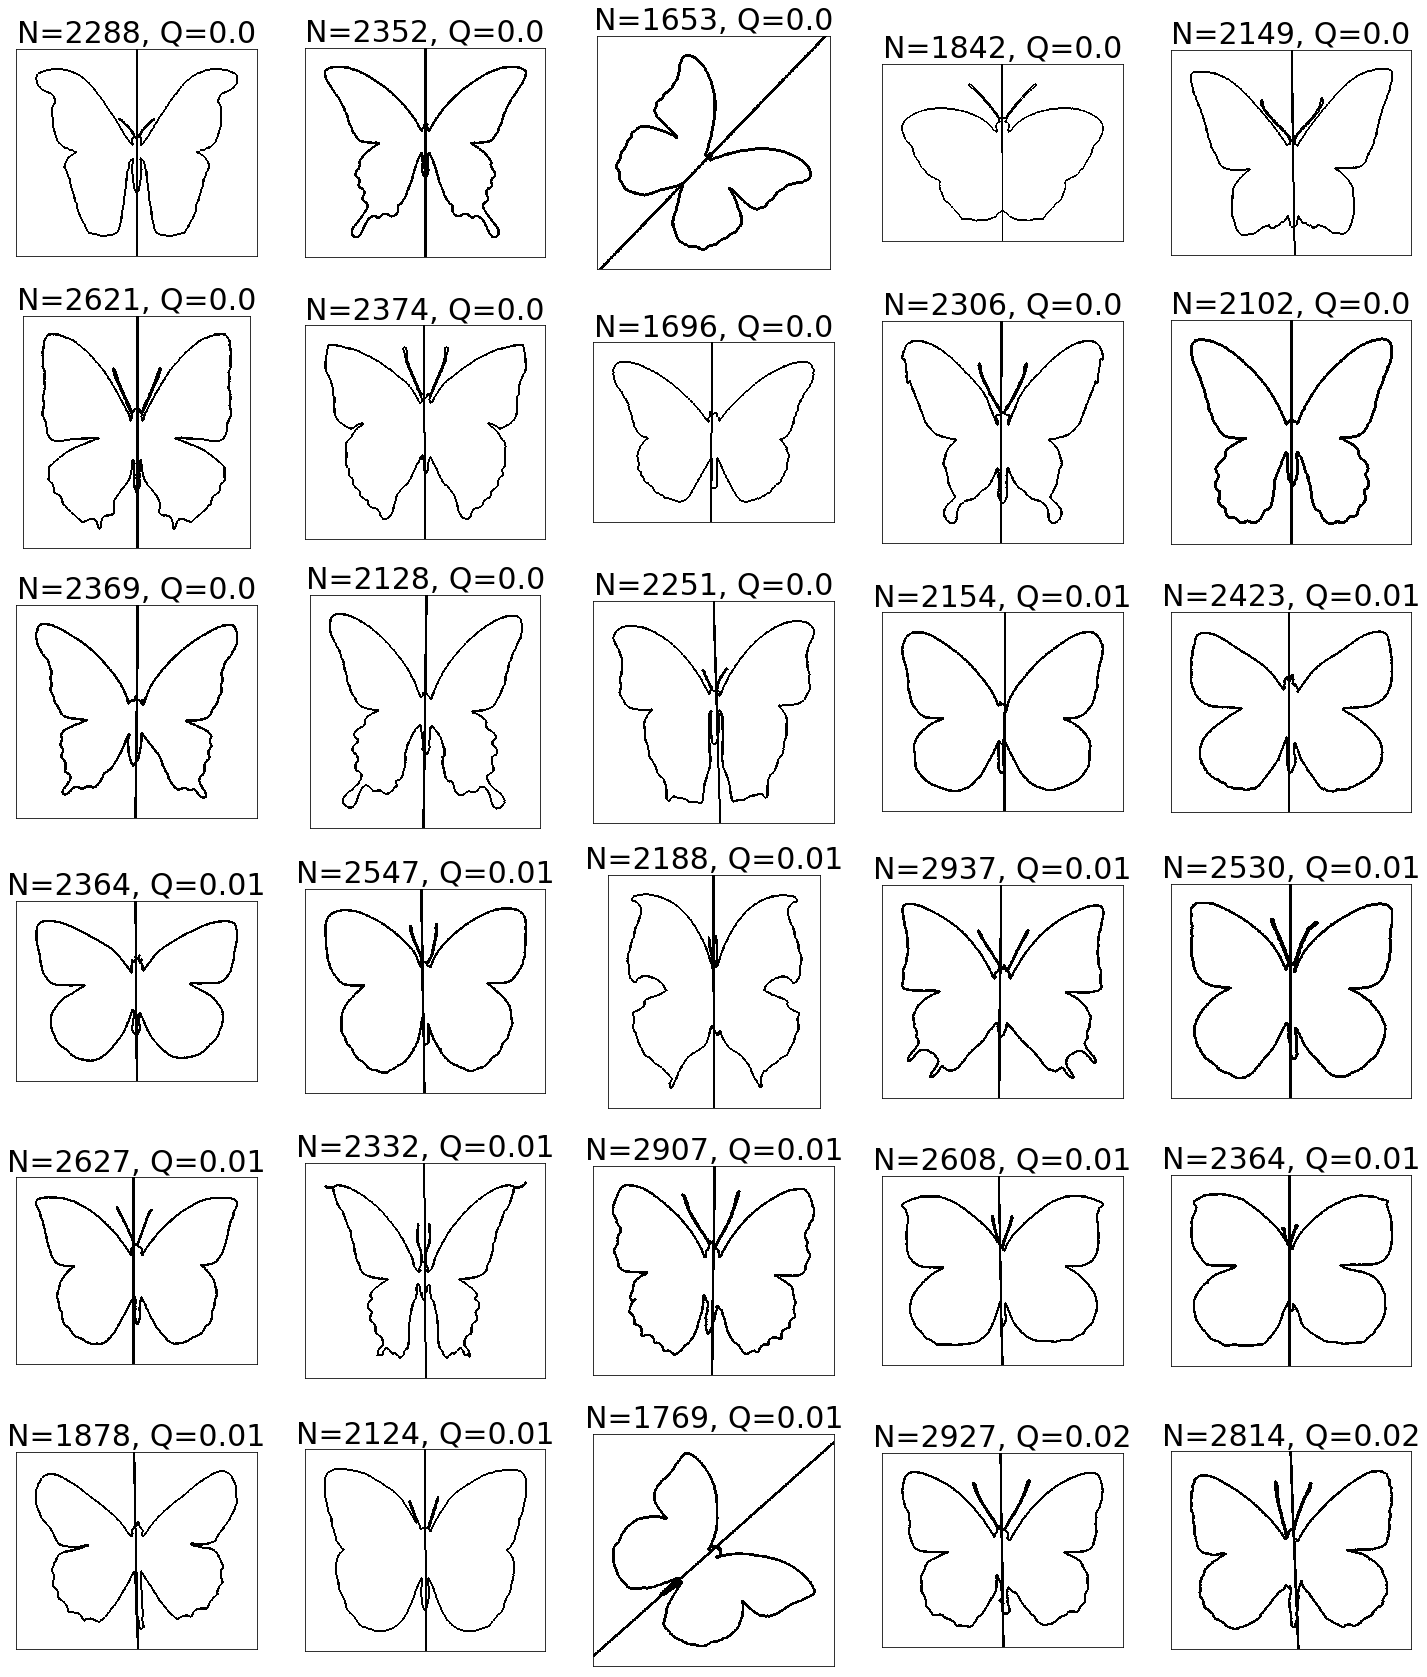

In [94]:
folders = [
    'data/to_visapp/planes',
    'data/to_visapp/many',
    'data/butterfly'
]
for folder in folders:
    zd.subploter(zs.get_drawing_args(folder))
    zd.savefig(folder.split('/')[-1], fmt='png')
    plt.show()